# Kickstarters Projects Analysis
# Sarah AlQahtani
# 29 - 10 - 2020

# What is Kickstarter?
<p><img style="float: left;margin:5px 20px 5px 1px" src="Kickstarter.png" width="300" height="155"></p>
<p>Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.
</p>
<p>Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.</p>
 
<p>If a project is successfully funded, Kickstarter applies a 5% fee to the funds collected.</p>

In [3]:
# load the requiered libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
class KickstartersAnalysis:

    # 1. Read the data and clean it
    @classmethod
    def get_data(cls,x):
        df=pd.read_csv(x)
        return df
    @classmethod
    def get_data_desc(cls,df):
        df.dtypes
        df.shape
        df.info()
    @classmethod
    def check_NA(cls,df):
        percent_missing = df.isnull().sum()
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
        NA_cols=list(missing_value_df[missing_value_df['percent_missing']>0].column_name)
        return NA_cols
    @classmethod
    def process_NA(cls,df):
        for n in cls.check_NA(df):
            if(df[n].dtype=='object'):
                df.dropna(subset=[n],inplace=True)
            else:
                df[n].fillna(value=df[n].mean(),inplace=True)
        return df.isna().sum()
    @classmethod
    def set_toDate(cls,df,date_col):
        df[date_col]=pd.to_datetime(df[date_col],format='%Y-%m-%d')
        print('Colmun {} has been converted to date type'.format(date_col))
        return df[date_col]
    @classmethod
    def get_state_percentage(cls,df):
        state=round(df['state'].value_counts()/len(df['state'])*100)
        state.plot.pie(autopct="%.1f%%")
        return state
    @classmethod
    def get_project_category(cls,df):
        df_cat=pd.DataFrame({'No_Of_Projects' : df.groupby( [ "main_category", "state"] ).size()}).reset_index()
        states = df_cat['state'].drop_duplicates()
        colors = ["#9ACD32", "#B22222","#000080","#74C976","#696969","#FFFF00"]
        pivot_df = df_cat.pivot(index='main_category', columns='state', values='No_Of_Projects')
        pivot_df.loc[:,states].plot.bar(stacked=True, color=colors, figsize=(10,7))
        return df_cat
    @classmethod
    def get_project_country(cls,df):
        df_con=pd.DataFrame({'No_Of_Projects' : df.groupby( [ "country"] ).size()}).reset_index()
        return df_con
    @classmethod
    def get_project_year(cls,df):
        df_year=pd.DataFrame({'No_Of_Projects' : df.groupby(pd.DatetimeIndex(df['launched']).year).size()}).reset_index()
        return df_year
    @classmethod
    def get_project_duration(cls,df):
        cls.set_toDate(kickstarter_df,'launched')
        cls.set_toDate(kickstarter_df,'deadline')
        df['duration']=df['deadline']-df['launched']
        df_duration=pd.DataFrame({'No_Of_Projects' : df[df['state']=='successful'].groupby(df['duration']).size()}).reset_index()
        sns.lineplot(data=df_duration,x='duration',y='No_Of_Projects')


In [5]:
## 1. Description of Kickstarters Dataset

In [6]:
#Read in the data
kickstarter_df=KickstartersAnalysis.get_data('/Users/alqahtsa/py_projects/Kickstarters/data/ks-projects-201801.csv')
# View the structure of the dataset
kickstarter_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
KickstartersAnalysis.get_data_desc(kickstarter_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


A data frame with 378,661 observations on 15 variables

## 2. Data Munging 
### Handeling the missing values
Let's check first the N/As values

In [8]:
KickstartersAnalysis.check_NA(kickstarter_df)

['name', 'usd pledged']

N/A values exists only in two coulmns which is usd.pledged and name. However, we won't be using this column for our analysis since we have the usd_pledged_real coulmn instead. Our next step will be process these tow columns with process_NA method.

In [9]:
KickstartersAnalysis.process_NA(kickstarter_df)

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

_process_NA_ method droped the missing values rows in name column and filled tha missing values in the usd pledged column with the mean of that column.

### Dates Formatting
Two dates columns _deadline_ and _launched_ in this data set are formatted as a character data type. Now, we are going to convert them to a Date data type so, we can handel them appropriately as dates in the analysis.

In [10]:
KickstartersAnalysis.set_toDate(kickstarter_df,'launched')
KickstartersAnalysis.set_toDate(kickstarter_df,'deadline')

Colmun launched has been converted to date type
Colmun deadline has been converted to date type


0        2015-10-09
1        2017-11-01
2        2013-02-26
3        2012-04-16
4        2015-08-29
            ...    
378656   2014-10-17
378657   2011-07-19
378658   2010-08-16
378659   2016-02-13
378660   2011-08-16
Name: deadline, Length: 378657, dtype: datetime64[ns]

## 2. Exploratory Data Analysis 
Let's check the status of Kickstarters projects
#### Question 1: How many sucessful projects in general?

failed        52.0
successful    35.0
canceled      10.0
undefined      1.0
live           1.0
suspended      0.0
Name: state, dtype: float64

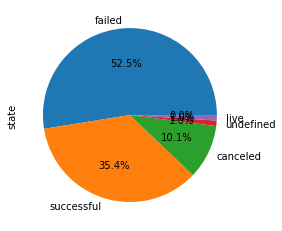

In [11]:
KickstartersAnalysis.get_state_percentage(kickstarter_df)

As we can see above that 35.38% of the projects were successful. However, 52.22% of the projects were failed. 10.24% of the projects were canceled for unknown reasons. 0.49% of the projects were suspended and 0.94% marked as undefined. In addition, a small percentage of projects were still live at the time of data collection (0.74%).


#### Question 2: How many projects for each category? and what is the top projects categories?

,main_category,state,No_Of_Projects
0,Art,canceled,2222
1,Art,failed,14130
2,Art,live,194
3,Art,successful,11510
4,Art,suspended,96
...,...,...,...
80,Theater,failed,3708
81,Theater,live,41
82,Theater,successful,6534
83,Theater,suspended,21


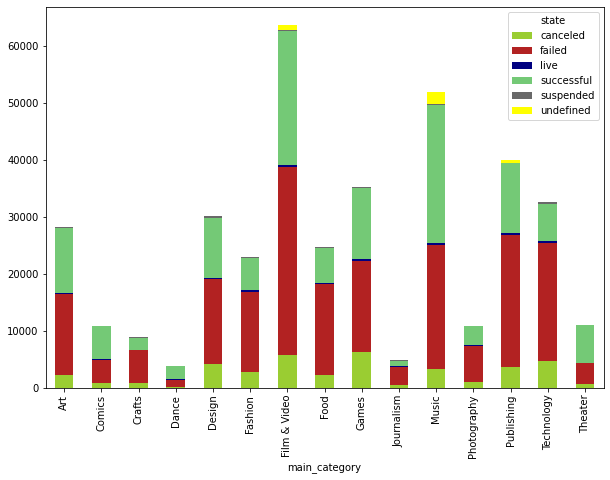

In [12]:
KickstartersAnalysis.get_project_category(kickstarter_df)

From the plot above we can see that the top three categories are:
- Film & Video
- Music
- Publishing

#### Question 3: How many projects per country?

In [13]:
KickstartersAnalysis.get_project_country(kickstarter_df)

,country,No_Of_Projects
0,AT,597
1,AU,7839
2,BE,617
3,CA,14756
4,CH,761
5,DE,4171
6,DK,1113
7,ES,2276
8,FR,2939
9,GB,33671


Most of the project were conducted in United states.

#### Question 4: How many projects per year?

In [14]:
KickstartersAnalysis.get_project_year(kickstarter_df)

,launched,No_Of_Projects
0,1970,7
1,2009,1329
2,2010,10519
3,2011,26236
4,2012,41163
5,2013,44851
6,2014,67745
7,2015,77300
8,2016,57183
9,2017,52200


#### Question 5: What is the duration of successful projects?
Let's see if the project duration can impact the success of kickstarters projects

Colmun launched has been converted to date type
Colmun deadline has been converted to date type


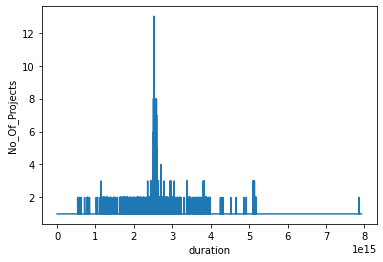

In [15]:
KickstartersAnalysis.get_project_duration(kickstarter_df)

From plot above, we can see that most of the successful  projects  take 25 - 35 days. 
